In [37]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# importing the dataset
df1 = pd.read_csv("Iris.csv")
df1.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# To understand the range of this datset
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This simple table indicates that scaling will be useful, but not an essential process for an efficient model. This is because the range of the values is not ideal, but it is also not greater than 10 to the pwer of 3.

In [39]:
# See iris names
iris_names = df1['Species'].unique()
iris_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

ANSWER 1:

From the array in line 115, the following variables are identified:

y = dependent variable = Species

x = independent variables = Sepal Length, Sepal Width, Petal Length, & Petal Width

In [40]:
# Renaming features so that they include Iris-setosa
df1['Species'] = np.where(df1['Species'] == 'Iris-setosa', 'Iris-setosa', 'not-Iris-setosa')

In [41]:
# Check the names after renaming.
ris_names = df1['Species'].unique()
iris_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
df1.head()       # Check the 1st 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# In order to produce a heatmap, and analyse the data, the object (string) features should be encoding.
# Encode the Species column: Iris-setosa as 0, & not-Iris-setosa as 1
object_columns = df1.columns[df1.dtypes == 'object']
object_columns

Index(['Species'], dtype='object')

In [44]:
# Encodes all object columns
for column in object_columns:
    df1[column] = LabelEncoder().fit_transform(df1[column])

df1.apply(LabelEncoder().fit_transform)
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [45]:
# Check the encoding of Species values is complete
iris_names = df1['Species'].unique()
iris_names

array([0, 1])

ANSWER 2:

The sample dataset from line 120 above, and the array indexed in line 121 show that the Species have been encoded as required.

<Axes: >

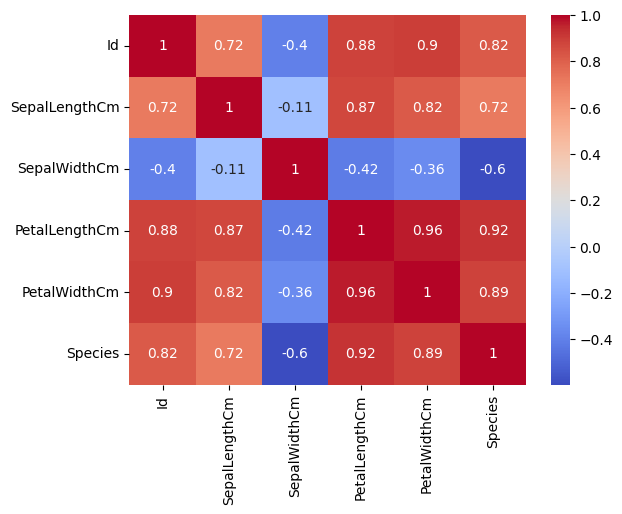

In [46]:
# For heatmap from red hot positive, to blue cool negative correlation.
# The weaker correlations will appear as faded pale squares, with values between around +0.25 to -0.25
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')     

From the heatmap above, the Sepal Width appears to negatively correlate to the value of the Iris-setosa Species.
The Petal Length appears to have the strongest positive correlation.

In [47]:
# After the exploratory stage, no variables will be dropped from this analysis.
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [48]:
# Defining feature & target variables
y = df1['Species']
X = df1.drop(columns= 'Species')

In [49]:
y.shape

(150,)

In [50]:
X.shape

(150, 5)

In [51]:
# Split data into training and test sets of 80% & 20% 
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed)

ANSWER 3:

The dataset above has now been split into training & testing sets; 80% : 20%.

In [52]:
# Fit a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

ANSWER 4:

In line 225 above, a logistic progression model has been fit to the dataset

In [53]:
# Make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)
y_pred[0:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

ANSWER 5:

In line 226 above, predictiond have been made on the model. The 1st 5 values are displayed.
This sample of predictions, gives an indication that 4 out of the 5 values are correctly predicted as Setosa.

In [54]:
# Confusion Matrix to indicate the accuracy of predictions.
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)
cm

[[12  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[12,  0],
       [ 0, 18]], dtype=int64)

<Figure size 5000x1500 with 0 Axes>

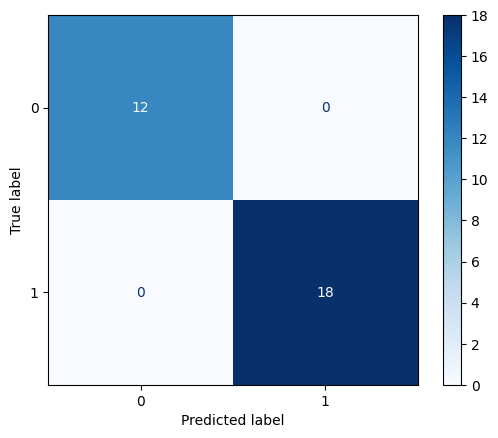

In [55]:
# Graphical confusion matrix
# sns.heatmap can also be used to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')


#plt.xlabel('Predicted')
#plt.ylabel('Truth')

ANSWER 6:

Both the graphical & numerical confusion matrixes show that the model predicted the dataset, with 100% accuracy. This is greater accuracy than expected because the 1st 5 values indicated 80% precision. This appears to have been aggregated out over the entire dataset.

ANSWER 7:

Because the confusion matrix shows 100% accuracy, the predictions for precision & recall are as follows:

PRECISION = 1

RECALL = 1

Therefore Precision = Recall = 1

ANSWER 8:

The following psuedocode outlines my logic for writing the code for accuracy, recall, & precision.

In [56]:
# Psuedocode for True Positive, True Negative, False Positive, & False Negative.

# True Positive is (y_test == 0)count  
# True Negative is  (y_test == 1)count
# False Positive is Total number of y == 0 minus y_test == 0
# False Negative  is Total number of y == 1 minus Y_test == 1

In [57]:
# Equation for Precision
# Precision = TP / (TP + FP)

In [58]:
# Equation for Recall
# Recall = TP / (TP + FN)

In [59]:
# Equation for Accuracy
# Accuracy = TP + TN / TP + TN + FP + FN

ANSWER 8:

The above Psuedocode outlines my thought process re. the code for Accuracy, Recall, & Precision. 
Unfortunately, that's as far as I can go right now!.

Looking forward to some advise from mentors or assessors to help convert the psuedocode into Python.

Below I have used the library functions to calculate these accuracy measures.

In [60]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))

Accuracy Score: 1.0
Confusion Matrix: 
 [[12  0]
 [ 0 18]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



ANSWER 9:

The Classification Report indicates a well fit model, with 100% accuracy. 
